In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [5]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_valid= scaler.fit_transform(X_valid)
X_test= scaler.fit_transform(X_test)

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
X_train.shape

(11610, 8)

In [10]:
model = keras.models.Sequential([ 
  keras.layers.Dense(30,activation="relu",input_shape=[8]),
  keras.layers.Dense(30,activation="relu"),  
  keras.layers.Dense(1)  
])

In [12]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(lr=1e-3),metrics=['mae'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 249us/sample - loss: 1.8631 - mae: 1.0009 - val_loss: 0.7804 - val_mae: 0.6648
Epoch 2/20
11610/11610 [==============================] - 1s 119us/sample - loss: 0.6723 - mae: 0.6092 - val_loss: 0.6186 - val_mae: 0.5804
Epoch 3/20
11610/11610 [==============================] - 1s 111us/sample - loss: 0.5927 - mae: 0.5608 - val_loss: 0.5829 - val_mae: 0.5634
Epoch 4/20
11610/11610 [==============================] - 1s 118us/sample - loss: 0.5550 - mae: 0.5401 - val_loss: 0.5511 - val_mae: 0.5438
Epoch 5/20
11610/11610 [==============================] - 1s 105us/sample - loss: 0.5278 - mae: 0.5238 - val_loss: 0.5357 - val_mae: 0.5357
Epoch 6/20
11610/11610 [==============================] - 1s 118us/sample - loss: 0.5032 - mae: 0.5098 - val_loss: 0.5102 - val_mae: 0.5226
Epoch 7/20
11610/11610 [==============================] - 1s 121us/sample - loss: 0.4863 - mae: 0.5026 - val_lo

In [16]:
mae_test = model.evaluate(X_test,y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [17]:
mae_test = model.evaluate(X_test,y_test)
model_history.history

{'loss': [1.8630863191288776,
  0.6723268832039155,
  0.5927273134133818,
  0.5549557611153724,
  0.5278301263861775,
  0.5032001591981433,
  0.48625867835002967,
  0.47013836985102614,
  0.4585774309670073,
  0.44755741841417257,
  0.43912484500040583,
  0.431604173376476,
  0.42550204823902205,
  0.4202936603220037,
  0.41540779366665725,
  0.41102040187743694,
  0.4076157877354864,
  0.40358214730029474,
  0.4007209645377265,
  0.39763178234465874],
 'mae': [1.000874,
  0.60915804,
  0.56077474,
  0.5401411,
  0.5238083,
  0.5097514,
  0.5025851,
  0.49197477,
  0.48624775,
  0.4792753,
  0.47449708,
  0.47036856,
  0.4668606,
  0.4640983,
  0.46149576,
  0.45862278,
  0.45648307,
  0.45378846,
  0.4530758,
  0.45097804],
 'val_loss': [0.7803657361087257,
  0.6185830612669312,
  0.5828513343358841,
  0.5510682144368342,
  0.5356990910623732,
  0.5101921037802093,
  0.5010722929039051,
  0.4868908231110536,
  0.47901247733631186,
  0.469692064040083,
  0.46835430492418373,
  0.460047

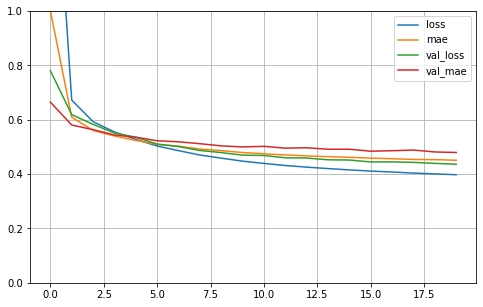

In [18]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [19]:
X_new = X_test[0:3]
y_pred = model.predict(X_new)

In [20]:
y_pred

array([[0.48195052],
       [1.930103  ],
       [3.628386  ]], dtype=float32)

In [21]:
del model

In [22]:
keras.backend.clear_session()

In [42]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation = "relu")(input_)
hidden2=keras.layers.Dense(30,activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_,hidden2])
output= keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_],outputs = [output])

In [43]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [44]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['mae'])

In [45]:
model_history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 162us/sample - loss: 2.0419 - mae: 1.0199 - val_loss: 0.7277 - val_mae: 0.6355
Epoch 2/20
11610/11610 [==============================] - 1s 72us/sample - loss: 0.7247 - mae: 0.6232 - val_loss: 0.6837 - val_mae: 0.6136
Epoch 3/20
11610/11610 [==============================] - 1s 82us/sample - loss: 0.6563 - mae: 0.5954 - val_loss: 0.6225 - val_mae: 0.5876
Epoch 4/20
11610/11610 [==============================] - 1s 87us/sample - loss: 0.6286 - mae: 0.5800 - val_loss: 0.5968 - val_mae: 0.5747
Epoch 5/20
11610/11610 [==============================] - 1s 89us/sample - loss: 0.5917 - mae: 0.5598 - val_loss: 0.5946 - val_mae: 0.5717
Epoch 6/20
11610/11610 [==============================] - 1s 74us/sample - loss: 0.5616 - mae: 0.5452 - val_loss: 0.5529 - val_mae: 0.5518
Epoch 7/20
11610/11610 [==============================] - 1s 73us/sample - loss: 0.5504 - mae: 0.5374 - val_loss: 0.

In [46]:
mae_test = model.evaluate(X_test,y_test)
model_history.history

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

{'loss': [2.0419026604559174,
  0.7247167083233416,
  0.6563362597135713,
  0.6286095502302628,
  0.5917372915171838,
  0.5615579607258779,
  0.5503688394561295,
  0.5220776956416121,
  0.5127528538691597,
  0.49316306139866306,
  0.4819087186730391,
  0.46990708839164325,
  0.4607864769751609,
  0.4516897755486507,
  0.44493872165987963,
  0.43734592573073894,
  0.4316600304292667,
  0.42545088515211854,
  0.42127217977956694,
  0.41635087000512544],
 'mae': [1.0199035,
  0.62318236,
  0.59535044,
  0.58000124,
  0.5598215,
  0.54518574,
  0.53737265,
  0.5240057,
  0.5183079,
  0.50858337,
  0.5016173,
  0.4951312,
  0.48983514,
  0.4852349,
  0.48080873,
  0.47650275,
  0.47290775,
  0.46903393,
  0.46789727,
  0.4641568],
 'val_loss': [0.7277393743665336,
  0.6836642439513243,
  0.6225273999440886,
  0.5967748299125553,
  0.5946220278739929,
  0.5529219109728662,
  0.5501107835800457,
  0.5266699494009486,
  0.5243723721621264,
  0.5077990151498977,
  0.5050023090315727,
  0.493852

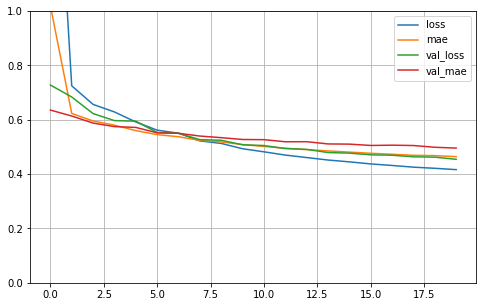

In [47]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [48]:
model.save("New_model.h5")

In [49]:
%pwd

'C:\\Users\\Akilesh Kumar\\Deep learning internshala'

In [50]:
del model

In [51]:
keras.backend.clear_session()

In [53]:
model=keras.models.load_model("New_model.h5")

In [54]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                